In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Cơ bản về mô phỏng dữ liệu

Dân số TP. HCM từ 1996 đến 2013 được cung cấp trong file `hcmc_population.dat`. Cột đầu tiên là dân số, cột thứ hai là tỉ lệ tăng so với năm trước

In [3]:
data = np.genfromtxt('hcmc_population.dat')
data.shape

(18, 2)

In [4]:
pop = np.array(data[:,0])
year = np.array([i+1996 for i,e in enumerate(pop)])
year

array([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013])

`subplots` là một đối tượng tạo ra một hình ảnh chứa một hoặc nhiều biểu đồ. Nó trả về một tuple gồm đối tượng toàn hình ảnh (`fig`) và các hệ trục tọa độ (`axes`). Tham khảo ví dụ sau:

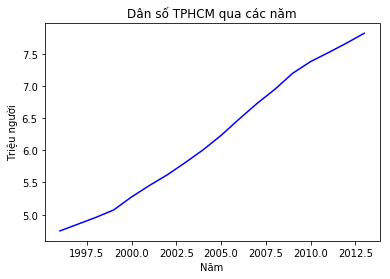

In [5]:
fig, axes = plt.subplots()
axes.plot(year, pop, 'b') # Blue
axes.set_xlabel('Năm')
axes.set_ylabel('Triệu người')
axes.set_title('Dân số TPHCM qua các năm');

### `xticks` và `yticks`

Nhưng trong ảnh trên, các năm lại không hiển thị theo số nguyên, nhìn mất tự nhiên. Chúng ta sẽ cấu hình lại để đánh dấu cứ hai năm một lần.

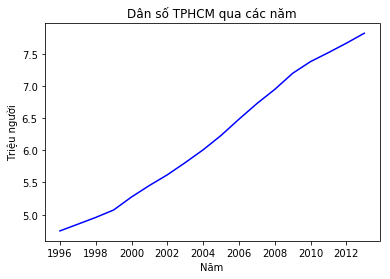

In [6]:
axes.set_xticks(year[0::2])
fig

### Dùng hàm để vẽ

Giả sử chúng ta muốn làm cho đồ thị biểu diễn "mượt hơn", hay muốn tìm xu hướng biến động dân số từ năm 1996 đến 2013 để dự đoán dân số 2014. Có nhiều cách làm cho ra các độ chính xác khác nhau, nhưng để đơn giản ta thử lấy trung bình tỉ lệ gia tăng dân số qua các năm (là $2.9431\%$), tìm dân số năm 1995 (là $4640400$ người) và lập ra công thức dân số năm $x > 1995$ là hàm $f(x)=4.6404\times(1 + 2.9431\%)^{x-1995}$ (triệu người)

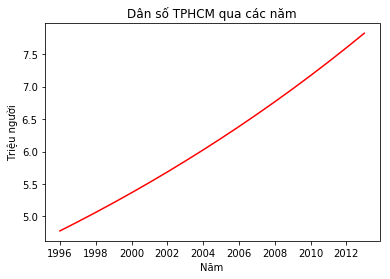

In [7]:
def f(x):
    return 4.6404*(1.029431**(x - 1995))
vf = np.vectorize(f)
pop2 = vf(year)
fig, axes = plt.subplots()
axes.plot(year, pop2, 'r') # Red
axes.set_xlabel('Năm')
axes.set_ylabel('Triệu người')
axes.set_title('Dân số TPHCM qua các năm');
axes.set_xticks(year[0::2])
plt.show(fig)

### Bảng chú thích (Legend)

Giờ chúng ta muốn so sánh kết quả này qua phép ngoại suy so với số liệu thực tế bằng cách đặt chồng hai đường này vào một hệ trục. Lúc này đòi hỏi mỗi lần `axes.plot(...)` phải đặt tham số `label`.

Sau cùng dùng lệnh `axes.legend(loc=x)` để hiển thị bảng chú thích, trong đó `x` là vị trí của bảng chú thích trong hệ trục:
- `loc=0`: `matplotlib` tự chọn vị trí tối ưu đặt bảng chú thích
- `loc=1`: Góc phải trên
- `loc=2`: Góc trái trên
- `loc=3`: Góc trái dưới
- `loc=4`: Góc phải dưới

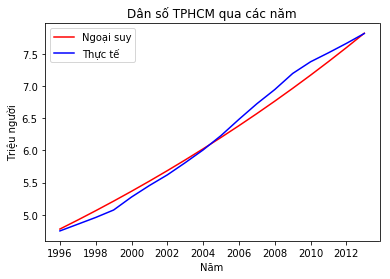

In [8]:
fig, ax = plt.subplots()
ax.plot(year, pop2, 'r', label="Ngoại suy") # Red
ax.plot(year, pop, 'b', label="Thực tế") # Blue
ax.set_xlabel("Năm")
ax.set_ylabel("Triệu người")
ax.set_title("Dân số TPHCM qua các năm");
ax.set_xticks(year[0::2])
ax.legend(loc=2)
plt.show(fig)

### Định dạng đường

Trong ví dụ trên đưa ra hai loại đường là đỏ và xanh, được gọi trong hàm `axes.plot(...)`. Ngoài ra ta còn có thể truyền vào hàm này nhiều tham số khác:
- `color`: có thể là `red`, `blue`, etc. hoặc `r`, `b`, etc. hoặc mã hex RGB của màu (ví dụ như `#FF3300`)
- `linewidth`, hay `lw`: độ dày của đường, nhận một số thực
- `linestyle`, hay `ls`: kiểu đường, các giá trị có thể là `-`, `--`, `-.`, `:`, `steps`
- `marker`: ký hiệu điểm, có thể là `o`, `+`, `*`, `s`, etc.
- https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html

### Định dạng chữ

In [9]:
# Default
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans', 'text.usetex': False})

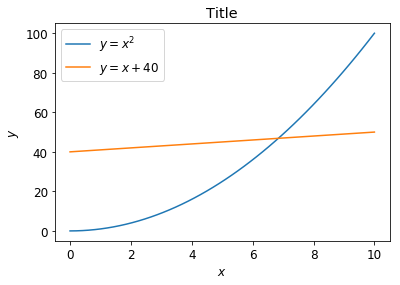

In [10]:
x = np.linspace(0, 10, 50)
fig, ax = plt.subplots()
ax.plot(x, x**2, label="$y = x^2$")
ax.plot(x, x+40, label="$y = x+40$")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_title("Title");
ax.legend()
plt.show(fig)

Một điểm đáng tiếc là nếu bạn đặt `text.usetex=true` thì tiêu đề của bạn không được chứa ký tự tiếng Việt.

### Hiển thị nhiều hệ trục trong một figure và các loại biểu đồ khác nhau

Có thể tùy chỉnh `nrows` (số dòng), `ncols` (số cột), và `figsize` (kích thước ảnh).

Nếu `nrows=1` thì `axes` sẽ là mảng một chiều, ngược lại `axes` là mảng hai chiều.

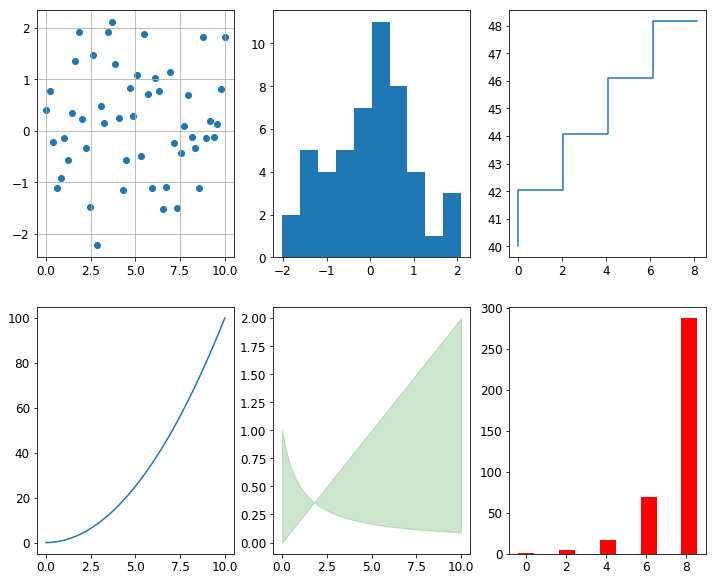

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))
axes[0][0].scatter(x, np.random.randn(50))
axes[0][0].grid(True)

axes[0][1].hist(np.random.randn(50))

axes[0][2].step(x[::10], x[::10]+40)

axes[1][0].plot(x, x**2)

axes[1][1].fill_between(x, 1.0/(x+1), x/5, color="green", alpha="0.2")

axes[1][2].bar(x[::10], 2**x[::10], color="red")

plt.show(fig)

Trên đây là những cái nhìn tổng quát về thư viện `matplotlib`, đủ để bạn tiếp cận và mô phỏng dữ liệu bằng Python. Trong quá trình nghiên cứu nếu xuất hiện thêm những nhu cầu mới bạn có thể Google.